<a href="https://colab.research.google.com/github/cyantran1711/personalportfolio/blob/main/Investment_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#This program attempts to optimize a investment portfolio using the Efficient Frontier

In [52]:
#import the python libraries
from pandas_datareader import data as web #dùng để lấy dữ liệu chứng khoán từ nguồn tài chính
import pandas as pd # xử lí dữ liệu dạng bảng data frame
import numpy as np # tính toán nhanh với số, ma trận, thống kế, xác suất
from datetime import datetime #làm việc với dữ liệu thời gian (chuyển đổi ngày tháng thành định dạng datetime --> hữu ích khi ptich biểu đồ giá theo tgian)
import matplotlib.pyplot as plt #vẽ biểu đồ trực quan hóa dữ liệu
plt.style.use('fivethirtyeight') #thay đổi style của biểu đồ để đẹp hơn (five thirty eight là một giao diện đồ thị chuyên nghiệp)

In [53]:
#Get the stock symbols/ tickers in the portfolio
#FAANG
assets = ['META', 'AMZN', 'AAPL', 'TSLA', 'GOOG'] #list có thể thêm xóa hoặc thay đổi phần tử

In [54]:
#assign weights to the stocks
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #array chỉ lưu trữ số dạng int hoặc float

In [55]:
# get the stocks/portfolio starting date
stockStartDate = '2019-01-01'

In [56]:
#get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2025-06-03'

In [57]:
pip install yfinance

In [58]:
import yfinance as yf

In [59]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#store the adjusted closed price of the stocks into the df (dùng hàm loop)
#lấy cột Adj close: giá đóng cửa đã điều chỉnh sau chia cổ tức, tách cổ phiếu
for stock in assets:
  try:
    data = yf.download(stock, start = stockStartDate, end = today)
    if 'Close' in data.columns:
      df[stock] = data['Close']
    else:
      print(f"Lỗi: Không tìm thấy 'Adj Close' trong dữ liệu của {stock}")
  except Exception as e:
    print(f"Lỗi khi tải dữ liệu {stock}: {e}")

print(df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                  META       AMZN       AAPL       TSLA       GOOG
Date                                                              
2019-01-02  135.043549  76.956497  37.617851  20.674667  52.045986
2019-01-03  131.122025  75.014000  33.870831  20.024000  50.563507
2019-01-04  137.302887  78.769501  35.316765  21.179333  53.283127
2019-01-07  137.402435  81.475502  35.238148  22.330667  53.167671
2019-01-08  141.861420  82.829002  35.909893  22.356667  53.560310


In [60]:
#df

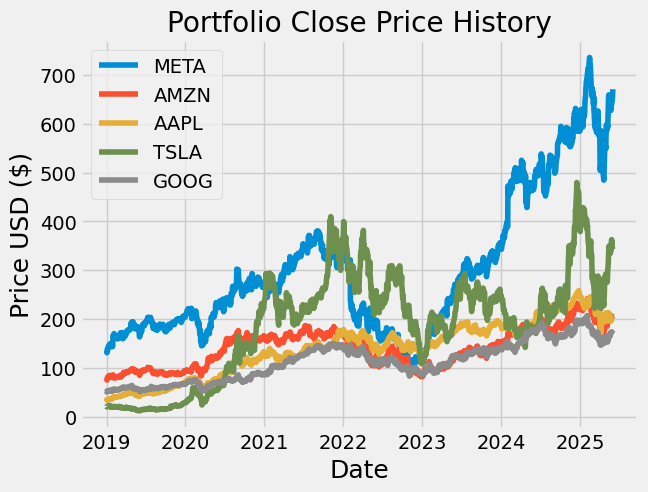

In [61]:
#visually show the stock portfolio
title = 'Portfolio Close Price History'

#Get the stocks
my_stocks = df

#create plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [62]:
#show the daily simple return
returns = df.pct_change()
returns

,META,AMZN,AAPL,TSLA,GOOG
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.029039,-0.025241,-0.099608,-0.031472,-0.028484
2019-01-04,0.047138,0.050064,0.042690,0.057697,0.053786
2019-01-07,0.000725,0.034353,-0.002226,0.054361,-0.002167
2019-01-08,0.032452,0.016612,0.019063,0.001164,0.007385
...,...,...,...,...,...
2025-05-27,0.024336,0.025026,0.025298,0.069399,0.025886
2025-05-28,0.001962,-0.006310,0.001049,-0.016506,-0.003449
2025-05-29,0.002284,0.004787,-0.002345,0.004287,-0.002422


In [63]:
#create and show the annualized covariance matrix
cov_matrix_annual = returns.cov()*252 #number of trading date of year
cov_matrix_annual

,META,AMZN,AAPL,TSLA,GOOG
META,0.182614,0.093027,0.076480,0.098978,0.085764
AMZN,0.093027,0.119396,0.066413,0.101263,0.071167
AAPL,0.076480,0.066413,0.101381,0.100999,0.063636
TSLA,0.098978,0.101263,0.100999,0.427853,0.085292
GOOG,0.085764,0.071167,0.063636,0.085292,0.099668


In [64]:
#calculate the variance of portfolio
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

np.float64(0.10467798843228596)

In [65]:
#calculate the portfolio's volitility
port_volitility = np.sqrt(port_variance)
port_volitility

np.float64(0.3235397787479709)

In [66]:
#calculate simple portfolio return
port_simple_annualReturns = np.sum(returns.mean()*weights)*252
port_simple_annualReturns

np.float64(0.3515137125101013)

In [67]:
# show the volitility, variance and expected return
percent_var = str(round(port_variance,2)*100)+'%'
percent_volitility = str(round(port_volitility,2)*100)+'%'
percent_ER = str(round(port_simple_annualReturns,2)*100)+'%'
print(f"Portfolio's expected annual return: {percent_ER}")
print(f"Portfolio's annual variance: {percent_var}")
print(f"Portfolio's annual volitility: {percent_volitility}")

Portfolio's expected annual return: 35.0%
Portfolio's annual variance: 10.0%
Portfolio's annual volitility: 32.0%


In [68]:
pip install PyPortfolioOpt

In [69]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [70]:
#Portfolio optimzation
#Calculate the expected returns and the annualized sample covariance matrix of the asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#opt for max SR (return for sum of volitility)
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('META', 0.10857), ('AMZN', 0.0), ('AAPL', 0.64609), ('TSLA', 0.24534), ('GOOG', 0.0)])
Expected annual return: 36.0%
Annual volatility: 34.4%
Sharpe Ratio: 1.05


(np.float64(0.3600821722568557),
 np.float64(0.3438704507706456),
 np.float64(1.0471448519344366))

In [71]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)

allocation, leftover = da.lp_portfolio()
print('Discretion allocation: ', allocation)
print('Fund remaining: ${:2f}'.format(leftover))

Discretion allocation:  {'META': 2, 'AAPL': 31, 'TSLA': 7}
Fund remaining: $6.670007


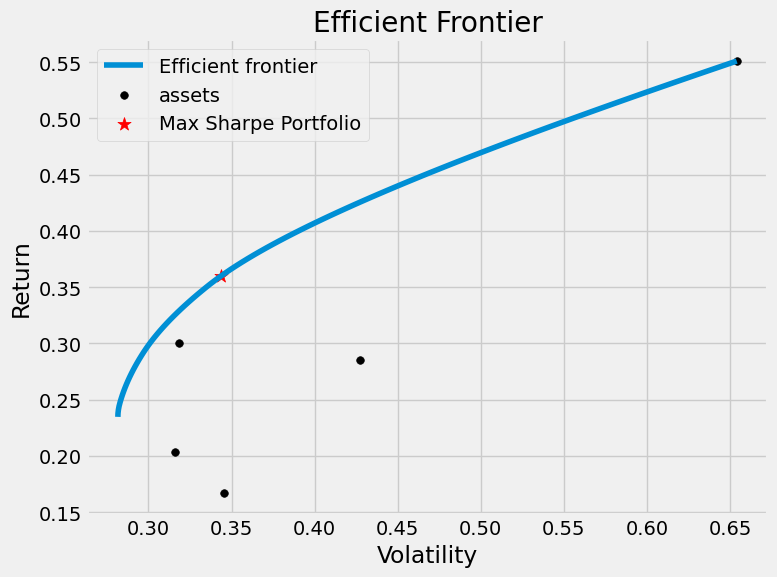

In [72]:
from pypfopt import plotting

# Create Efficient Frontier graph
ef_plot = EfficientFrontier(mu, S)
fig, ax = plt.subplots(figsize=(8, 6))
plotting.plot_efficient_frontier(ef_plot, ax=ax, show_assets=True)

# Create Max Sharpe Portfolio
ret, risk, sharpe = ef.portfolio_performance()
ax.scatter(risk, ret, marker="*", color="r", s=100, label="Max Sharpe Portfolio")

ax.set_title("Efficient Frontier")
ax.legend()
plt.tight_layout()
plt.show()
